In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [3]:
def euler(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    
    x1 = np.zeros(len(t))         #create our return vector
    delt = t[1] - t[0]
    
    x1[0] = x0       #define initial value
    
    for i, t in enumerate(t):
        if i == len(dom)-1:      #avoid throwing index error
            break
        x1[i+1] = x1[i] + delt*(f(x1[i],t))     #use euler's method
        
    return x1

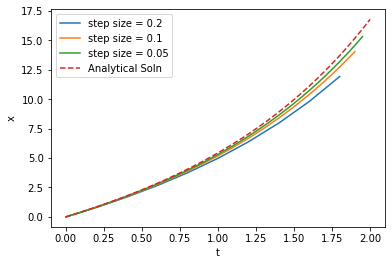

In [4]:
f = lambda x,t: x - 2*t + 4
analytical = lambda t: -2 + 2*t + 2*np.exp(t)
delts = [.2, .1, .05]

for delt in delts:
    dom = np.arange(0,2,delt)
    plt.plot(dom, euler(f, 0, dom), label = 'step size = '+str(delt))
plt.plot(np.linspace(0,2,200), analytical(np.linspace(0,2,200)), linestyle='dashed',label='Analytical Soln')
plt.legend() 
plt.xlabel('t')
plt.ylabel('x')       #plot analytical solution and approximations w/ different step sizes
plt.show()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [5]:
def midpoint(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    
    x1 = np.zeros(len(t))         #create our return vector
    delt = t[1] - t[0]
    
    x1[0] = x0       #define initial value
    
    for i, t in enumerate(t):
        if i == len(dom)-1:      #avoid throwing index error
            break
        x1[i+1] = x1[i] + delt*f(x1[i] + delt/2*f(x1[i],t), t + delt/2)     #use midpoint method
    return x1
    

def rk4(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    x = np.zeros(len(t))         #create our return vector
    delt = t[1] - t[0]
    
    x[0] = x0       #define initial value
    
    for i, t in enumerate(t):
        if i == len(dom)-1:      #avoid throwing index error
            break
            
        k1 = f(x[i], t)
        k2 = f(x[i] + k1*delt/2, t + delt/2)
        k3 = f(x[i] + k2*delt/2, t + delt/2)
        k4 = f(x[i] + delt*k3, t+delt)
        
        x[i+1] = x[i] + (delt/6)*(k1 + 2*k2 + 2*k3 + k4)    #use rk4 method
    return x

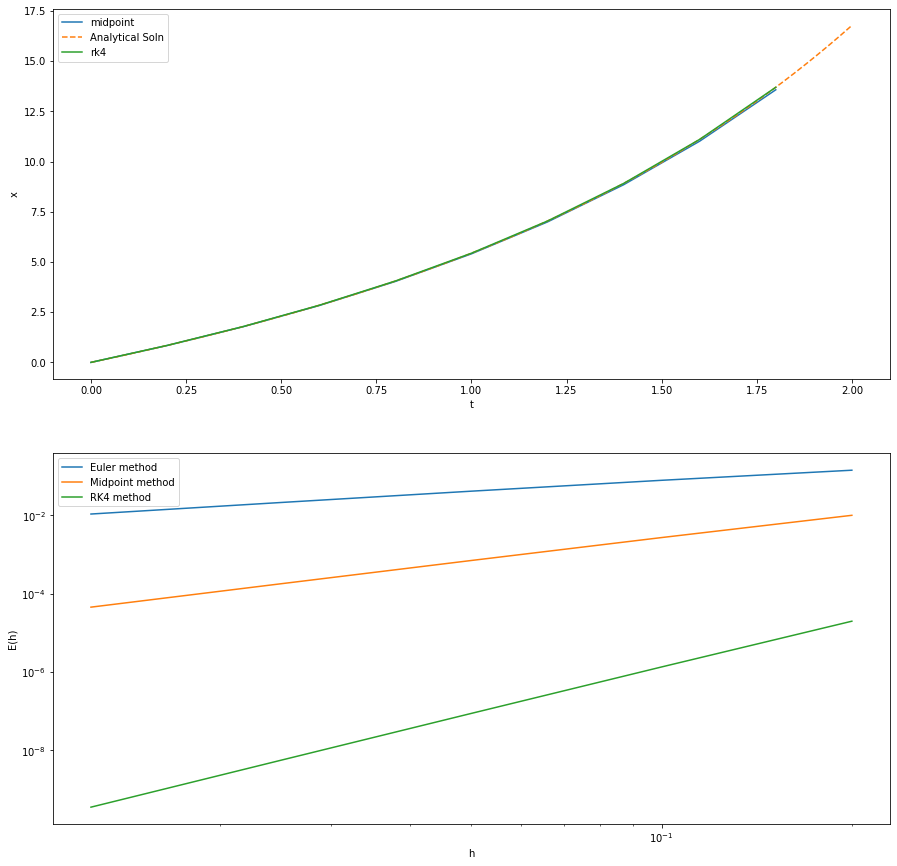

In [6]:
f = lambda x,t: x - 2*t + 4
analytical = lambda t: -2 + 2*t + 2*np.exp(t)    #define f and our analytical function

plt.figure(figsize=(15, 15))
plt.subplot(211)
dom = np.arange(0,2,.2)
plt.plot(dom, midpoint(f, 0, dom), label = 'midpoint')   #plot the midpoint solution
plt.plot(np.linspace(0,2,200), analytical(np.linspace(0,2,200)), linestyle='dashed',label='Analytical Soln')
plt.plot(dom, rk4(f,0,dom),label='rk4')   #plot rk4 method
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

plt.subplot(212)
dom = np.arange(0,2,.2)
hs = [.2, .1, .05, .025, .0125]    #define different step vals

euler_er = []
mp_er = []
rk4_er = []

x2 = analytical(2)

for h in hs:
    dom = np.arange(0,2+h,h)
    euler_er.append(np.linalg.norm((x2 - euler(f,0,dom)[-1]))/np.linalg.norm(x2))    #calculate relative error
    mp_er.append(np.linalg.norm((x2 - midpoint(f,0,dom)[-1]))/np.linalg.norm(x2))
    rk4_er.append(np.linalg.norm((x2 - rk4(f,0,dom)[-1]))/np.linalg.norm(x2))
    
plt.loglog(hs, euler_er, label='Euler method')
plt.loglog(hs, mp_er, label='Midpoint method')
plt.loglog(hs, rk4_er, label='RK4 method')       #plot on log scale
plt.legend()
plt.xlabel('h')
plt.ylabel('E(h)')



plt.show()

## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

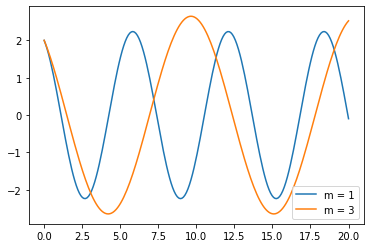

In [7]:
def rk4(f,x0,t):        #redefine rk4 for vector functions
    """Numerically approximates the solution to the IVP:    
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    x = np.zeros((t.shape[0], x0.shape[0]))         #create our return vector
    delt = t[1] - t[0]
    
    x[0, :] = x0       #define initial value
    
    for i in range(1, len(t)):
                   
        k1 = f(x[i-1], t[i-1])
        k2 = f(x[i-1] + k1*delt/2, t[i-1] + delt/2)    #define all of our ks
        k3 = f(x[i-1] + k2*delt/2, t[i-1] + delt/2)
        k4 = f(x[i-1] + delt*k3, t[i])
        
        x[i] = x[i-1] + (delt/6)*(k1 + 2*k2 + 2*k3 + k4)    #use rk4 method
    return x



x0 = np.array([2, -1])      

f1 = lambda x,t: np.array([x[1], (-1)*x[0]])      #create the functions with the different coefficients
f2 = lambda x,t: np.array([x[1], (-1/3)*x[0]])
dom = np.linspace(0,20,200)

sol1 = rk4(f1, x0, dom)
sol2 = rk4(f2, x0, dom)

plt.plot(dom, sol1[:,0], label = 'm = 1')
plt.plot(dom, sol2[:,0], label = 'm = 3')      #plot y(t) in both cases
plt.legend()
plt.show()

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

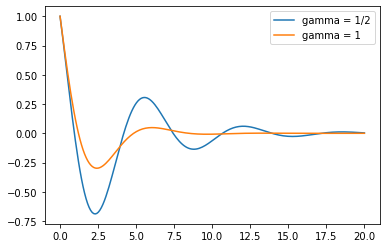

In [8]:
f1 = lambda x,t: np.array([x[1], (-1/2)*x[1] - x[0]])
f2 = lambda x,t: np.array([x[1], (-1)*x[1] - x[0]])    #define our two different ivp problems

x0 = np.array([1, -1])     #initial value
dom = np.linspace(0,20,200)

sol1 = rk4(f1, x0, dom)     #calculate each solution
sol2 = rk4(f2, x0, dom)

plt.plot(dom, sol1[:,0], label = 'gamma = 1/2')
plt.plot(dom, sol2[:,0], label = 'gamma = 1')      #plot y(t) in both cases
plt.legend()
plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

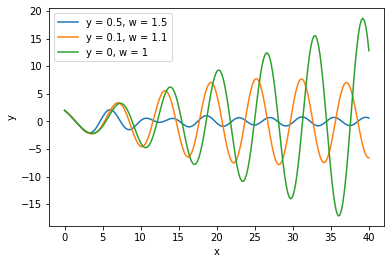

In [9]:
gam = [.5, .1, 0]
om = [1.5, 1.1, 1]

x0 = np.array([2, -1])     #initial value
dom = np.linspace(0,40,200)

for i in range(3):
    f1 = lambda x,t: np.array([x[1], np.cos(om[i]*(t)) - (gam[i]/2)*x[1] - x[0]])  #define f
    sol1 = rk4(f1, x0, dom)     #calculate each solution
    plt.plot(dom, sol1[:,0], label = 'y = '+str(gam[i])+', w = '+str(om[i]))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()